# **BUSINESS CASE 3: Recheio Rocommendation System**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Project Overview  
This notebook utilizes the following datasets:  
- Case3_Recheio_2025 (1).xlsx <br>
- The goal of the project is to design a recomendation system so that the company can propose better products to existing costumers.

## 📊 Goal of the notebook

In this notebook we process with the EDA of the data <br>

**Table of Contents** <br>
* [1. Initial Setup and DataLoading](#setup)
* [2. Data Understanding/Preparation](#DU/P)

<hr>
<a class="anchor" id="setup">

 ## 1. Initial Setup and Data Loading
 </a>

In [80]:
#Packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [82]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

In [83]:
# Loading the data
data_clients = pd.read_excel('../Data/Case3_Recheio_2025 (1).xlsx', sheet_name='1. CLIENTS', usecols='B:D', skiprows=1)
data_products = pd.read_excel('../Data/Case3_Recheio_2025 (1).xlsx', sheet_name='2. PRODUCTS', usecols='B:D', skiprows=1)
data_transactions = pd.read_excel('../Data/Case3_Recheio_2025 (1).xlsx', sheet_name='3. TRANSACTIONS', usecols='B:D', skiprows=1)

<hr>
<a class="anchor" id="DU/P">

## 2. Data Understanding/Preparation
</a>

In [84]:
clients = data_clients.copy()
products = data_products.copy()
transactions = data_transactions.copy()

## **Clients**

In [85]:
clients.head()

,Client ID,ZIP Code,ID Client Type
0,210100002,4049,NaN
1,210100003,4000,NaN
2,210100004,4149,NaN
3,210100005,4100,Hotelaria
4,210100006,4405,NaN


In [86]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Client ID       6462 non-null   int64 
 1   ZIP Code        6462 non-null   int64 
 2   ID Client Type  680 non-null    object
dtypes: int64(2), object(1)
memory usage: 151.6+ KB


In [87]:
clients.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Client ID,6462.0,NaN,NaN,NaN,210103526.874807,5023.309391,210100002.0,210101651.25,210103331.5,210104959.75,210199949.0
ZIP Code,6462.0,NaN,NaN,NaN,4176.482049,760.43223,0.0,4050.0,4400.0,4470.0,9950.0
ID Client Type,680,26,Hotelaria,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Checking for duplicates
print(clients.duplicated().sum())
print(clients['Client ID'].duplicated().sum())

0
0


In [89]:
# clients that don't have a ZIP code with 4 digits
clients[clients['ZIP Code'].apply(lambda x: len(str(x)) != 4)]

,Client ID,ZIP Code,ID Client Type
73,210100078,0,NaN
74,210100079,0,NaN
330,210100335,0,NaN
331,210100336,0,NaN
332,210100337,0,NaN
335,210100340,0,NaN
336,210100341,0,NaN
432,210100438,0,NaN
690,210100707,3,NaN
691,210100708,1,NaN


In [90]:
# Checking the different client types
clients['ID Client Type'].value_counts()

ID Client Type
Hotelaria                                    231
Coletiva/Instituição/Cantina                 139
Restaurante - Cozinha Portuguesa             135
Café/Pastelaria                               57
Catering                                      34
Bar/Discoteca                                 15
Restaurante - Cervejaria                      10
Restaurante - Japonês                         10
Restaurante - Churrasqueira                    8
Retail Outros                                  7
Padaria/Pastelaria                             7
Restaurante - Chinês                           4
Restaurante - Tapas & Petiscos                 4
Restaurante - Outra Cozinha Internacional      3
Restaurante - Steak House                      2
Frutaria                                       2
Restaurante - Italiano                         2
Restaurante - Marisqueira                      2
Restaurante - RodÃ­zio                         1
Mercearia                                      1
Garra

### Insights 

- No duplicate clients

- ZIP code has some invalid numbers. In Portugal all zip codes should have 4 digits, but in some cases (38) the ZIP code is either 0, 1, or 3. None of these clients have a Client Type associated. If they have no transactions associated, they may be removed.

- ID Client has a lot of missing values (around 90%). This will need to be addressed. Additionally,  one client has the client type "Restaurante -  Rodãzio" associated. This is likely a typo, so it needs to be replaced by "Restaurante - Rodízio".

## **Products**

In [91]:
products.head()

,ID Product,Product Description,ID Product Category
0,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS
1,276806,LARANJA CAL7 (67/76) RCH,FRUTAS FRESCAS
2,276809,LIMAO CAL 3/4 RCH,FRUTAS FRESCAS
3,277674,COGUMELO BRANCO MÉDIO RCH,LEGUMES FRESCOS
4,277917,TOMATE BB 67/82 1CAM RCH,LEGUMES FRESCOS


In [92]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID Product           4583 non-null   int64 
 1   Product Description  4583 non-null   object
 2   ID Product Category  4583 non-null   object
dtypes: int64(1), object(2)
memory usage: 107.5+ KB


In [93]:
products.describe(include='object').T

,count,unique,top,freq
Product Description,4583,4573,CABO ESFREGONA VILEDA SUPER 1UN,2
ID Product Category,4583,268,VINHOS TINTOS,175


In [94]:
# Checking for duplicates
print(products.duplicated().sum())
print(products['ID Product'].duplicated().sum())

0
0


In [95]:
# Some products have the same description but different IDs
products[products['Product Description'].duplicated(keep=False)].sort_values('Product Description')

,ID Product,Product Description,ID Product Category
4018,975734,AREIAS DE MANTEIGA 300 G,BOLACHAS
3779,814295,AREIAS DE MANTEIGA 300 G,BOLACHAS
2883,946293,CABO ESFREGONA VILEDA SUPER 1UN,ACESSÓRIOS LIMPEZA GERAL
4044,969528,CABO ESFREGONA VILEDA SUPER 1UN,ACESSÓRIOS LIMPEZA GERAL
329,923162,CREME VEGETAL MCHEF KG,CREMES VEGETAIS
3590,973849,CREME VEGETAL MCHEF KG,CREMES VEGETAIS
1382,714976,DIP POT MOLHO ALHO HEINZ 100X 25GR,MOLHOS
4319,981288,DIP POT MOLHO ALHO HEINZ 100X 25GR,MOLHOS
2466,965058,"FEIJÃO PRETO CISTER BOLSA 3/1,8 KG",CONSERVAS VEGETAIS
2854,957861,"FEIJÃO PRETO CISTER BOLSA 3/1,8 KG",CONSERVAS VEGETAIS


### Insights 

- No duplicate rows or product IDs. However, in some cases (10), different product IDs have the same Product Description and ID Product Category. These are duplicate entries, so this will need to be addressed.

## **Transactions**

In [96]:
transactions.head()

,Date,Client ID,ID Product
0,2022-01-02,210100281,224780
1,2022-01-02,210100281,276806
2,2022-01-02,210100281,276809
3,2022-01-02,210100281,277674
4,2022-01-02,210100281,277917


In [97]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884099 entries, 0 to 884098
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        884099 non-null  datetime64[ns]
 1   Client ID   884099 non-null  int64         
 2   ID Product  884099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 20.2 MB


In [98]:
# checking for duplicate rows
transactions[transactions.duplicated()]

,Date,Client ID,ID Product
104615,2022-03-01,210100804,904364
105040,2022-03-01,210102196,521205
105329,2022-03-01,210103577,931201
105452,2022-03-01,210103706,935622
106122,2022-03-01,210104607,372332
106311,2022-03-01,210105057,621958
107265,2022-03-01,210105808,906995
107505,2022-03-01,210105969,701988
107508,2022-03-01,210105969,931201


In [99]:
# checking if all clients have made transactions
client_list = clients['Client ID'].unique()

missing_clients = [client for client in client_list if client not in transactions['Client ID'].values]

print(f'There are {len(client_list)} clients in the clients table. Of those, {len(missing_clients)} clients have not made any transactions.')

There are 6462 clients in the clients table. Of those, 4933 clients have not made any transactions.


In [100]:
# Checking if the clients with invalid ZIP codes have made transactions
invalid_clients = clients[clients['ZIP Code'].apply(lambda x: len(str(x)) != 4)]['Client ID'].unique()

transactions[transactions['Client ID'].isin(invalid_clients)]['Client ID'].unique()

print(f'There are {len(invalid_clients)} clients with invalid ZIP codes. Of those, {len(transactions[transactions["Client ID"].isin(invalid_clients)]["Client ID"].unique())} clients have made transactions.')

There are 38 clients with invalid ZIP codes. Of those, 0 clients have made transactions.


In [101]:
# checking if all products have been sold
product_list = products['ID Product'].unique()

missing_products = [product for product in product_list if product not in transactions['ID Product'].values]
print(f'There are {len(product_list)} products in the products table. Of those, {len(missing_products)} products have not been sold.')

There are 4583 products in the products table. Of those, 0 products have not been sold.


### Insights 

- There are some duplicates. This likely corresponds to the same client purchasing the same product twice in the same day. As such, we will keep these rows

- The clients with invalid ZIP codes have no transactions associated. As such, they may be removed.

- Around 75% of the clients dataset have no transactions associated.

## **Cleaning Datasets**

In [102]:
# removing the clients with invalid ZIP codes (38 cases), since they have no valid ZIP code or client type, and they have no transactions
clients = clients[clients['ZIP Code'].apply(lambda x: len(str(x)) == 4)]

In [103]:
# correcting the typo in the client type
clients.loc[clients['ID Client Type'] == 'Restaurante - RodÃ­zio', 'ID Client Type'] = 'Restaurante - Rodízio'

In [104]:
# Removing the duplicates in the products table
# this includes correcting the products table and the transactions table
# We will keep the product with the lowest ID and map others to it

# Find duplicates based on 'Product Description'
dupes = products[products['Product Description'].duplicated(keep=False)]

# Create mapping: each duplicate ID to the minimum ID of that group
id_map = {}
for _, group in dupes.groupby('Product Description'):
    min_id = group['ID Product'].min()
    for product_id in group['ID Product']:
        if product_id != min_id:
            id_map[product_id] = min_id

# we will now update the transactions dataset to use the lowest ID for each product
transactions['ID Product'] = transactions['ID Product'].replace(id_map)

# Drop duplicate products, keeping the one with the lowest ID
products = products.drop_duplicates(subset='Product Description', keep='first')

## **EDA**

We will start by merging the 3 datasets to perform the exploratory data analysis and try to uncover some patterns in the transactions of the clients. <br>
Worth noting that we will not simply disregard the other clients, as we would be removing around 75% of the dataset. These will simply be addressed at a later stage.

In [105]:
# merge datasets now the issues have been fixed
df = transactions.merge(clients, on='Client ID')
df = df.merge(products, on='ID Product')

df = df[['Date', 'Client ID', 'ZIP Code', 'ID Client Type', 'ID Product', 'Product Description', 'ID Product Category']]

In [106]:
df.head()

,Date,Client ID,ZIP Code,ID Client Type,ID Product,Product Description,ID Product Category
0,2022-01-02,210100281,4400,Café/Pastelaria,224780,FARINHA ESPIGA AMIDO MILHO LUS.2KG,FARINHAS
1,2022-01-02,210100281,4400,Café/Pastelaria,276806,LARANJA CAL7 (67/76) RCH,FRUTAS FRESCAS
2,2022-01-02,210100281,4400,Café/Pastelaria,276809,LIMAO CAL 3/4 RCH,FRUTAS FRESCAS
3,2022-01-02,210100281,4400,Café/Pastelaria,277674,COGUMELO BRANCO MÉDIO RCH,LEGUMES FRESCOS
4,2022-01-02,210100281,4400,Café/Pastelaria,277917,TOMATE BB 67/82 1CAM RCH,LEGUMES FRESCOS


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883940 entries, 0 to 883939
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 883940 non-null  datetime64[ns]
 1   Client ID            883940 non-null  int64         
 2   ZIP Code             883940 non-null  int64         
 3   ID Client Type       389814 non-null  object        
 4   ID Product           883940 non-null  int64         
 5   Product Description  883940 non-null  object        
 6   ID Product Category  883940 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 47.2+ MB


In [108]:
df.describe()

,Date,Client ID,ZIP Code,ID Product
count,883940,8.839400e+05,883940.000000,8.839400e+05
mean,2022-07-08 12:24:11.696721664,2.101059e+08,4291.278318,9.117004e+05
min,2022-01-02 00:00:00,2.101000e+08,1100.000000,1.234000e+03
25%,2022-04-19 00:00:00,2.101034e+08,4050.000000,4.949070e+05
50%,2022-07-11 00:00:00,2.101045e+08,4400.000000,7.310710e+05
75%,2022-09-30 00:00:00,2.101057e+08,4460.000000,8.774840e+05
max,2022-12-31 00:00:00,2.101999e+08,6420.000000,9.128690e+08
std,NaN,1.223424e+04,296.041127,9.733120e+06


In [109]:
df.describe(include='object')

,ID Client Type,Product Description,ID Product Category
count,389814,883940,883940
unique,22,4571,268
top,Hotelaria,LEITE MCHEF UHT M/GORDO LT,LEGUMES FRESCOS
freq,206221,12009,62717


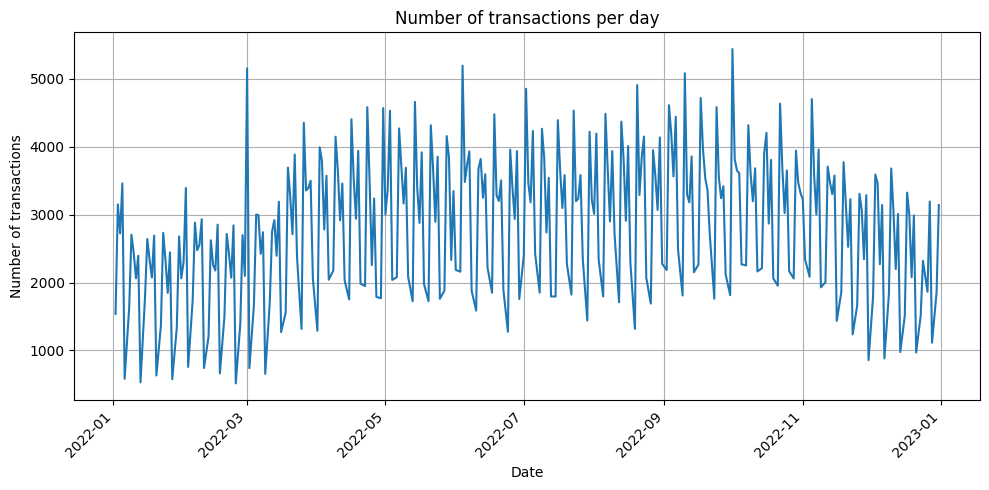

In [110]:
# daily sales

df.groupby('Date').size().plot(figsize=(10, 5), title='Number of transactions per day', fontsize=plots_Title_fontSize)
plt.xlabel('Date', fontsize=subPlots_xAxis_fontSize)
plt.ylabel('Number of transactions', fontsize=subPlots_yAxis_fontSize)
plt.xticks(rotation=45, fontsize=subPlots_xAxis_fontSize)
plt.yticks(fontsize=subPlots_yAxis_fontSize)
plt.grid()
plt.tight_layout()
plt.show()

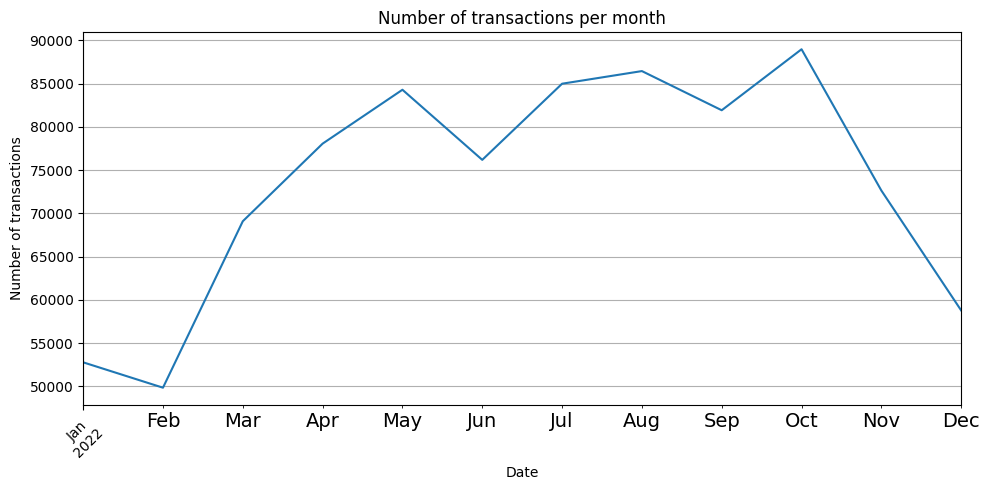

In [111]:
# monthly sales

df.groupby(df['Date'].dt.to_period('M')).size().plot(figsize=(10, 5), title='Number of transactions per month', fontsize=plots_Title_fontSize)
plt.xlabel('Date', fontsize=subPlots_xAxis_fontSize)
plt.ylabel('Number of transactions', fontsize=subPlots_yAxis_fontSize)
plt.xticks(rotation=45, fontsize=subPlots_xAxis_fontSize)
plt.yticks(fontsize=subPlots_yAxis_fontSize)
plt.grid()
plt.tight_layout()
plt.show()


In [112]:
# table with the top 10 clients, the client type and the number of transactions

top10_clients = df.groupby('Client ID').size().sort_values(ascending=False).head(10)
top10_clients_ids = top10_clients.index

top10_clients_df = df[df['Client ID'].isin(top10_clients_ids)][['Client ID', 'ID Client Type']].drop_duplicates()

top10_clients_df['Number of transactions'] = top10_clients.values

top10_clients_df



,Client ID,ID Client Type,Number of transactions
2706,210103706,NaN,13274
23054,210105096,Hotelaria,12700
23814,210104260,Hotelaria,11438
72067,210103651,Hotelaria,9497
111302,210104277,NaN,8674
114295,210103678,Hotelaria,7731
127277,210103141,Hotelaria,7212
129127,210106090,Hotelaria,6562
151621,210103361,Hotelaria,6524
152732,210105456,Hotelaria,5889


In [113]:
# assuming a client would not make multiple orders in the same day, let's see the clients that have the most orders
# while this may not be 100% accurate, it should provide a good approximation of the clients that are making the most orders and the type of client they are

top10_orders = df.groupby(['Client ID', 'Date']).size().reset_index(name='Number of transactions').groupby('Client ID').size().sort_values(ascending=False).head(10)
top10_orders_ids = top10_orders.index

top10_orders_df = df[df['Client ID'].isin(top10_orders_ids)][['Client ID', 'ID Client Type']].drop_duplicates()
top10_orders_df['Number of transactions'] = top10_orders.values

top10_orders_df 

,Client ID,ID Client Type,Number of transactions
978,210105362,NaN,286
1217,210105769,NaN,275
1400,210105969,Coletiva/Instituição/Cantina,238
1744,210101588,Restaurante - Cozinha Portuguesa,207
2456,210103056,NaN,204
2588,210103577,NaN,202
2706,210103706,NaN,200
3485,210105057,NaN,197
10053,210105591,Catering,177
56965,210105149,Restaurante - Cozinha Portuguesa,175


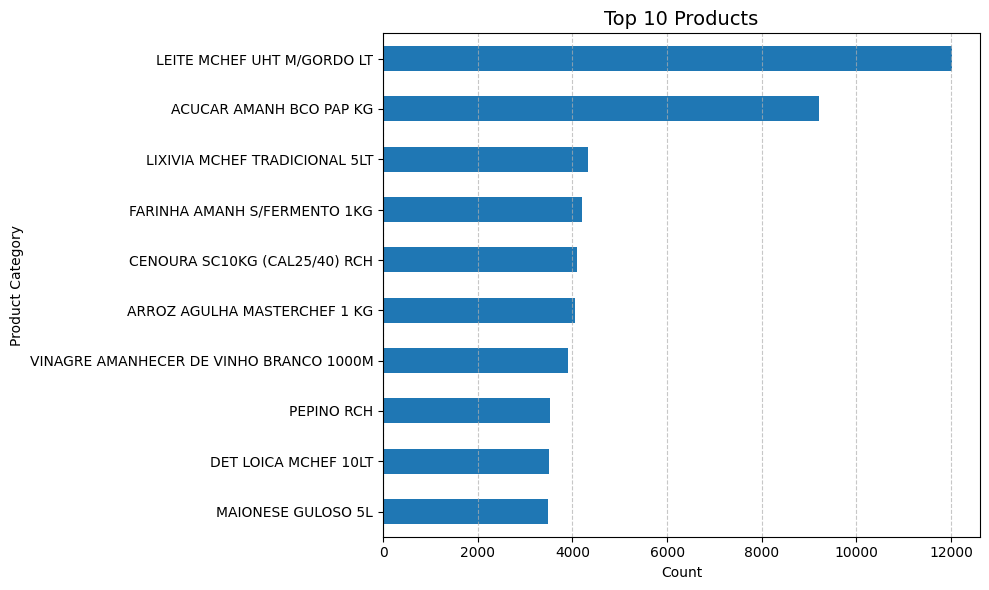

In [114]:
# Top 10 products sold

df['Product Description'].value_counts().head(10).iloc[::-1].plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Products', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Count', fontsize=subPlots_xAxis_fontSize)
plt.ylabel('Product Category', fontsize=subPlots_yAxis_fontSize)
plt.xticks(fontsize=subPlots_xAxis_fontSize)
plt.yticks(fontsize=subPlots_yAxis_fontSize)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

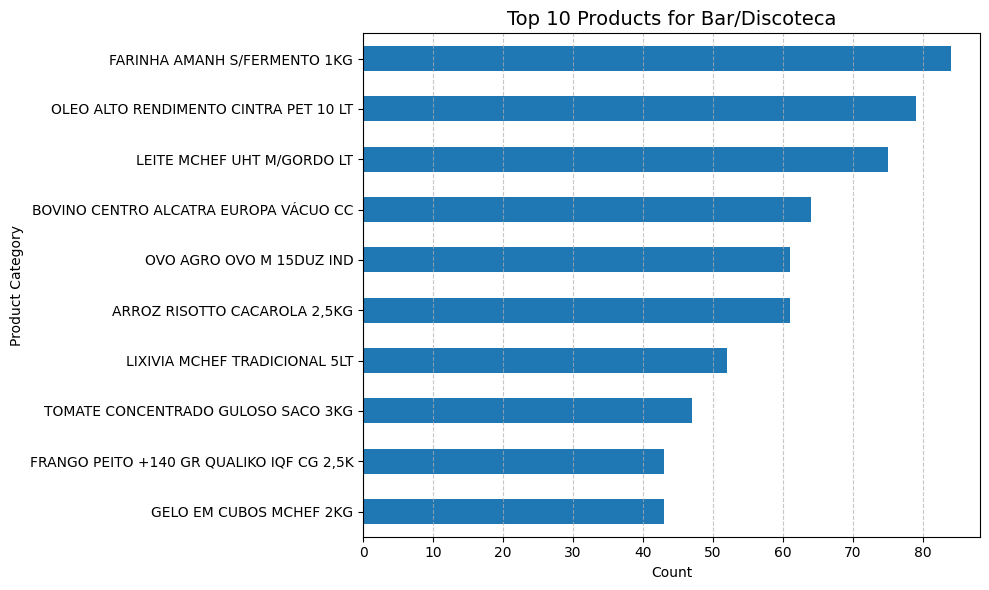

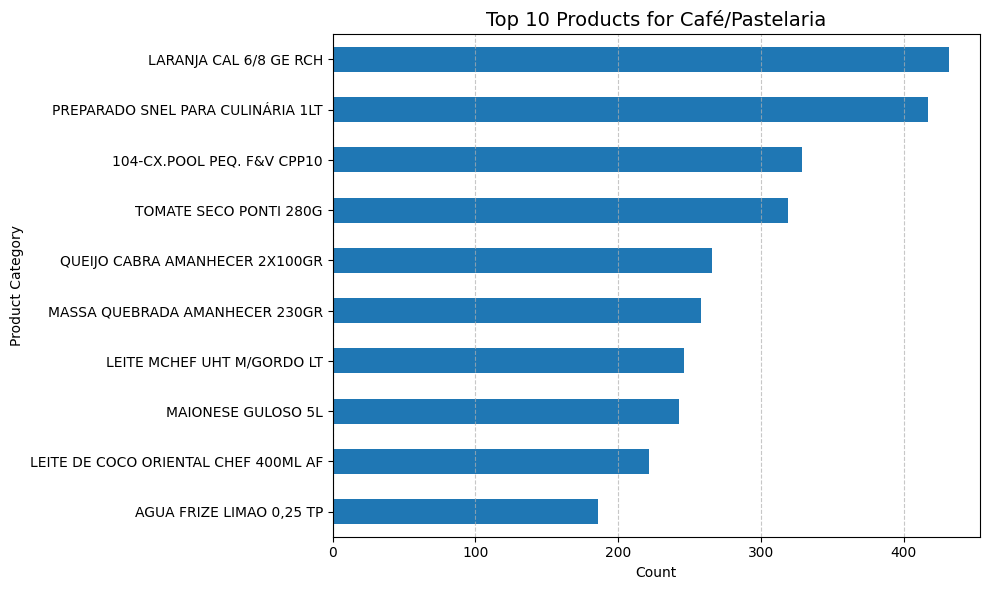

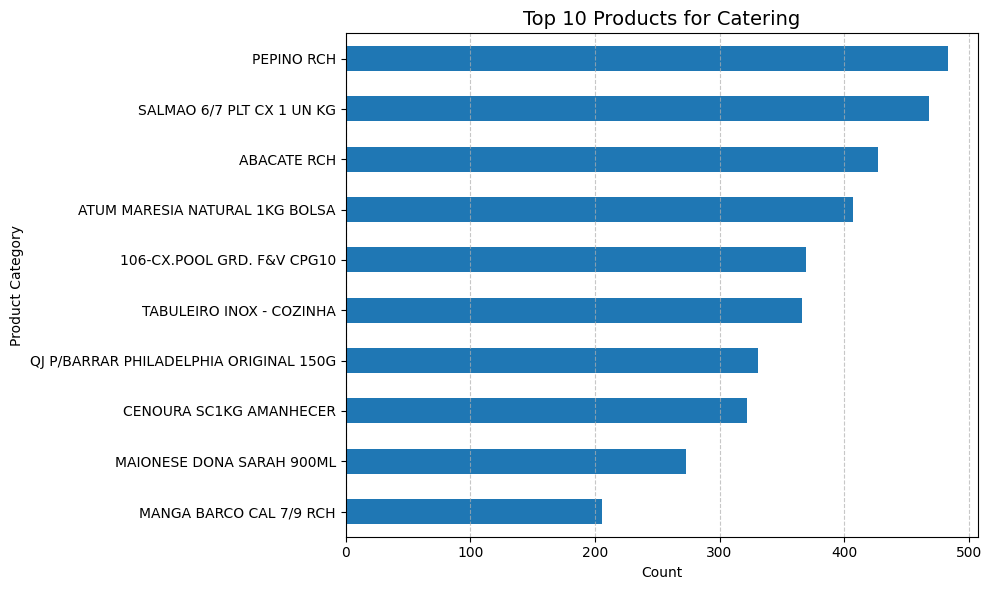

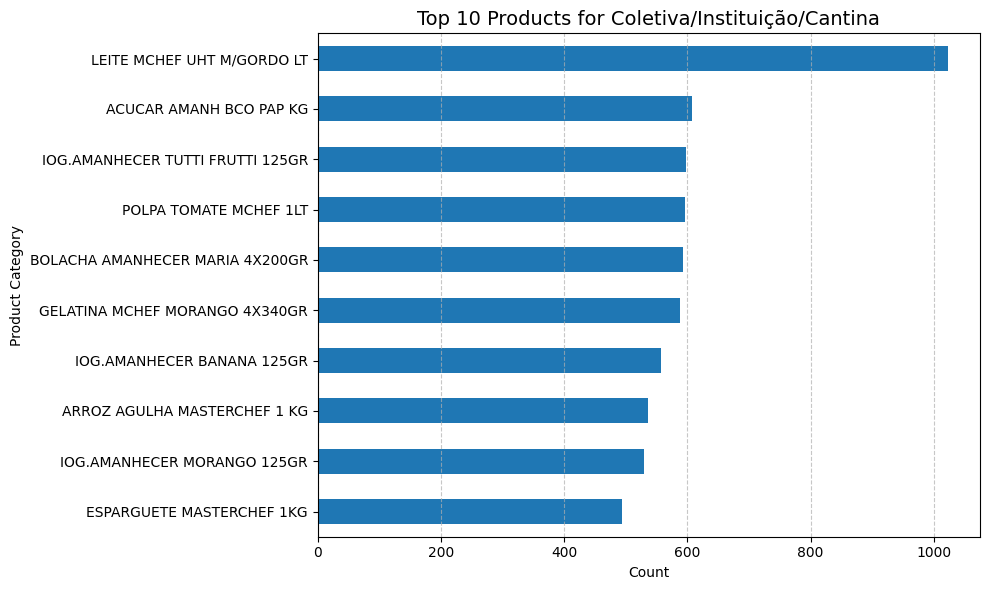

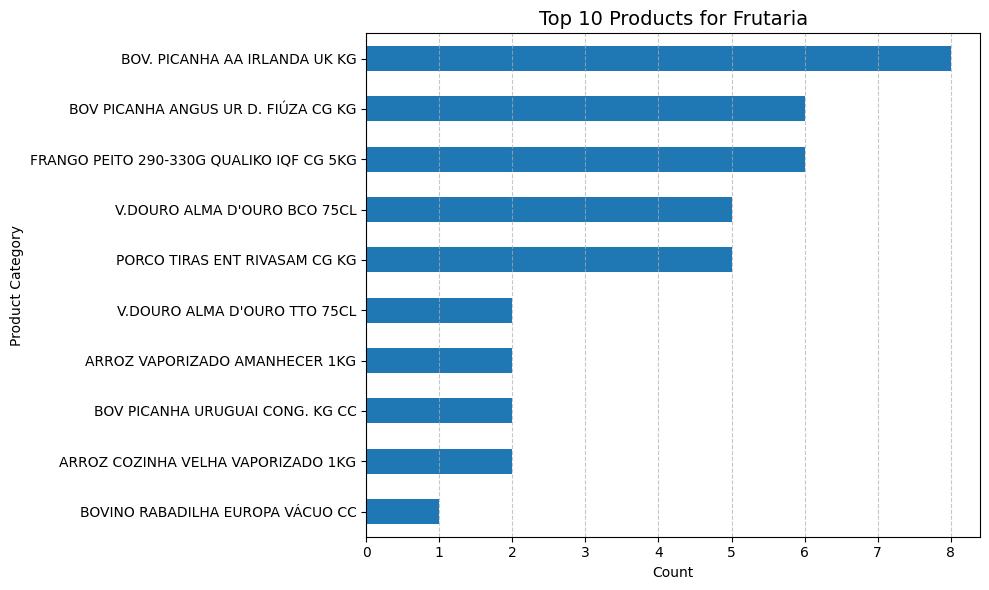

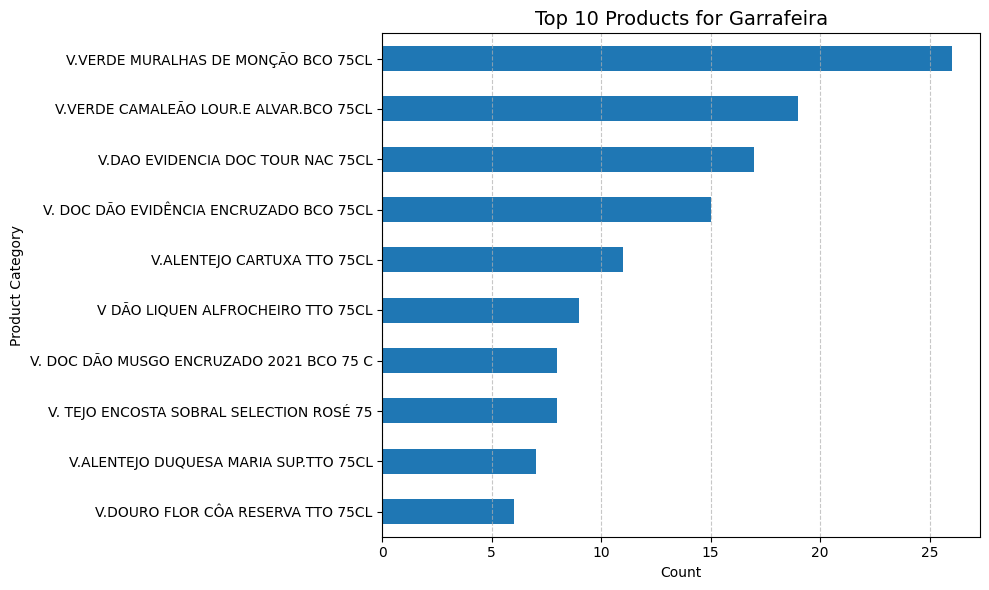

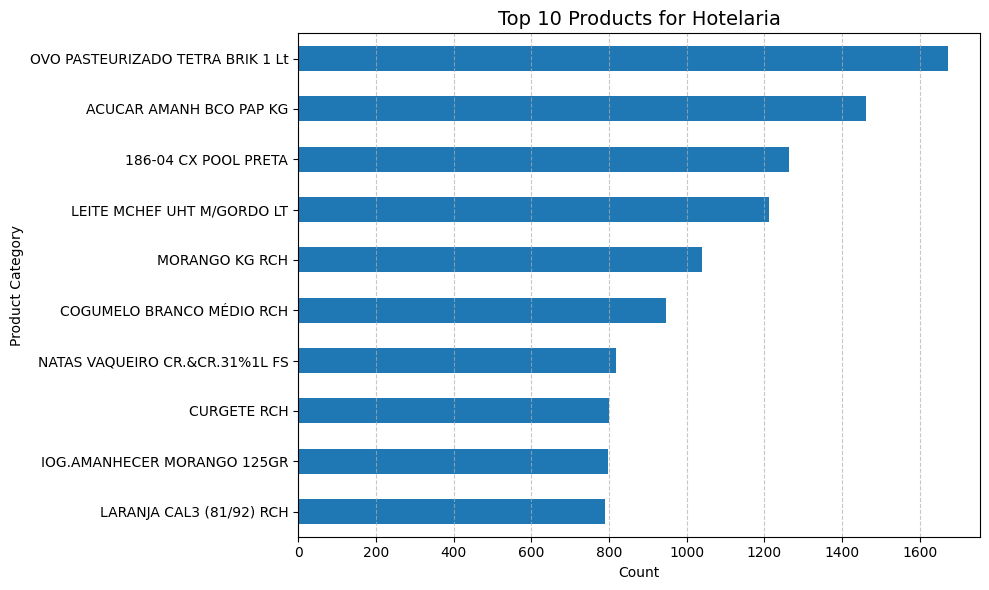

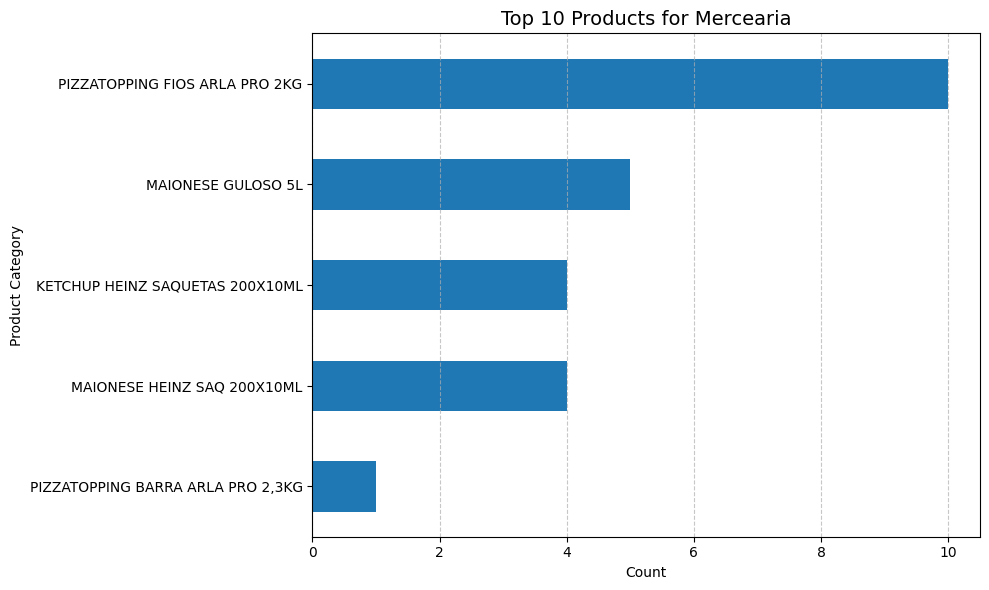

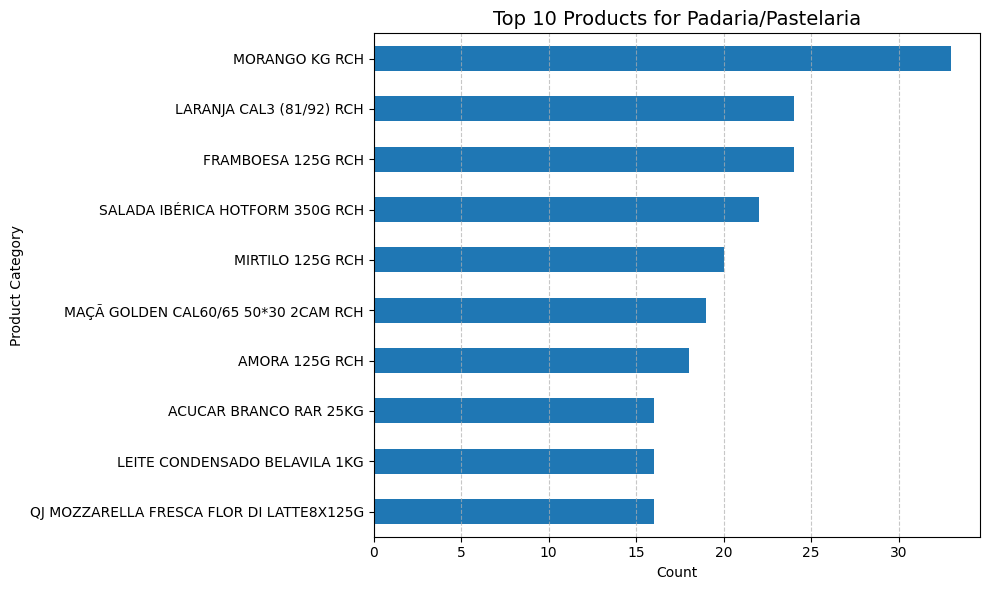

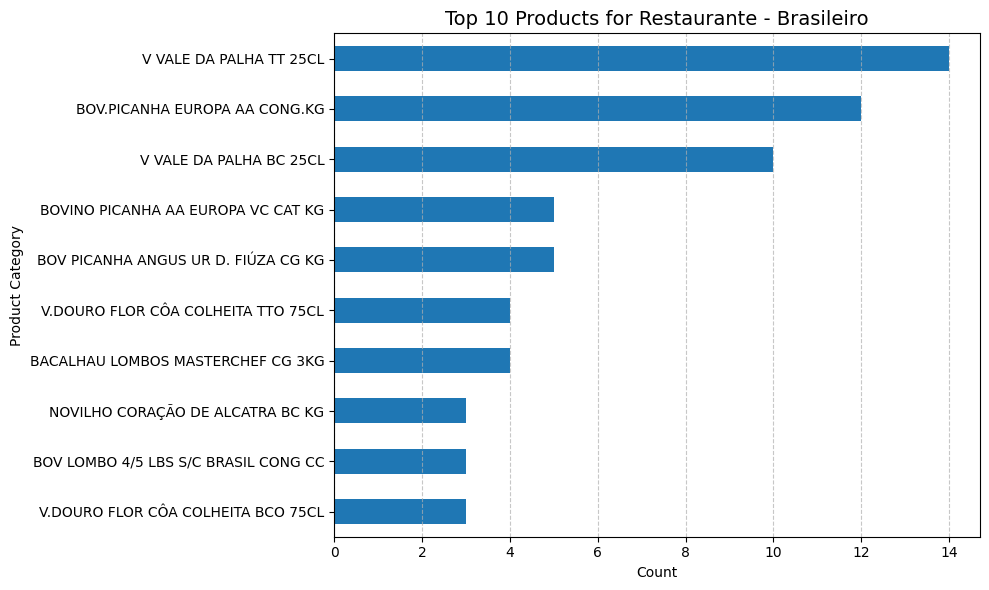

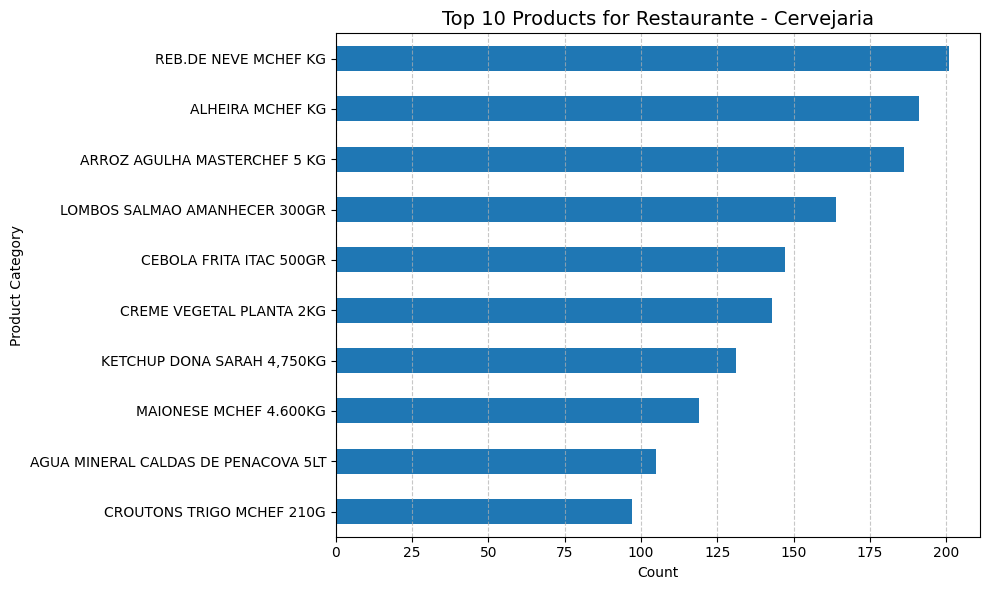

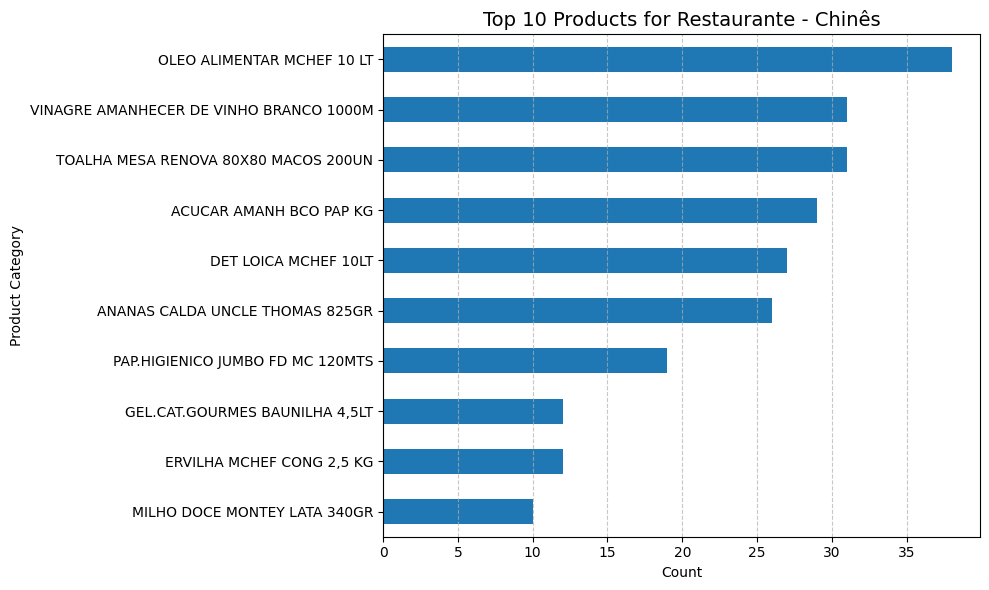

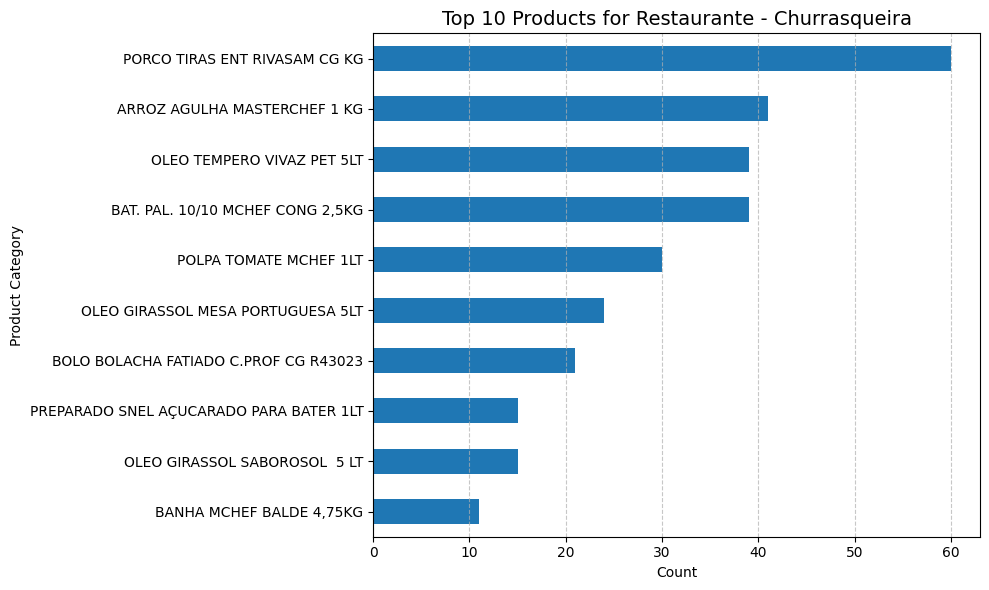

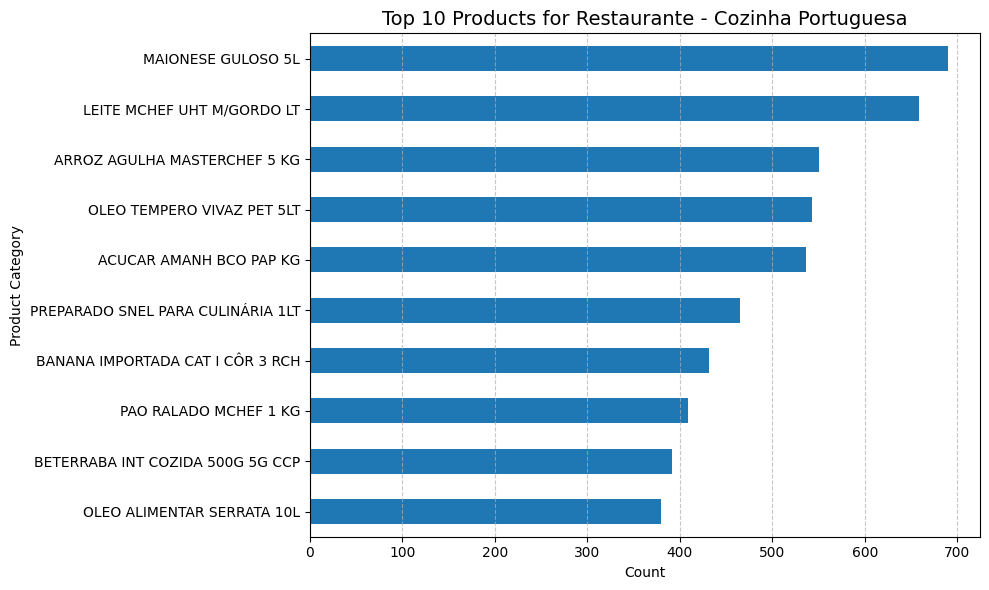

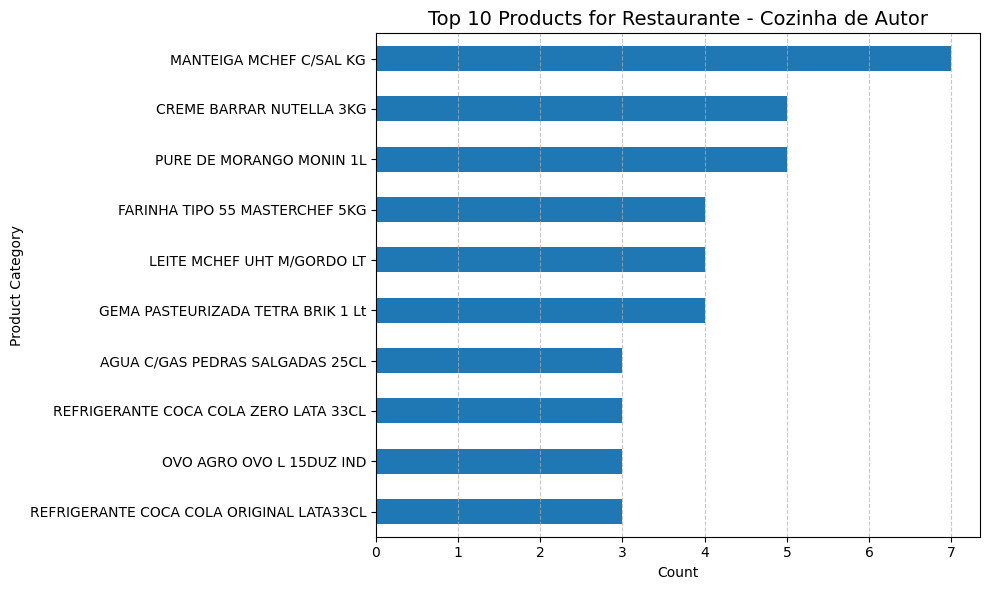

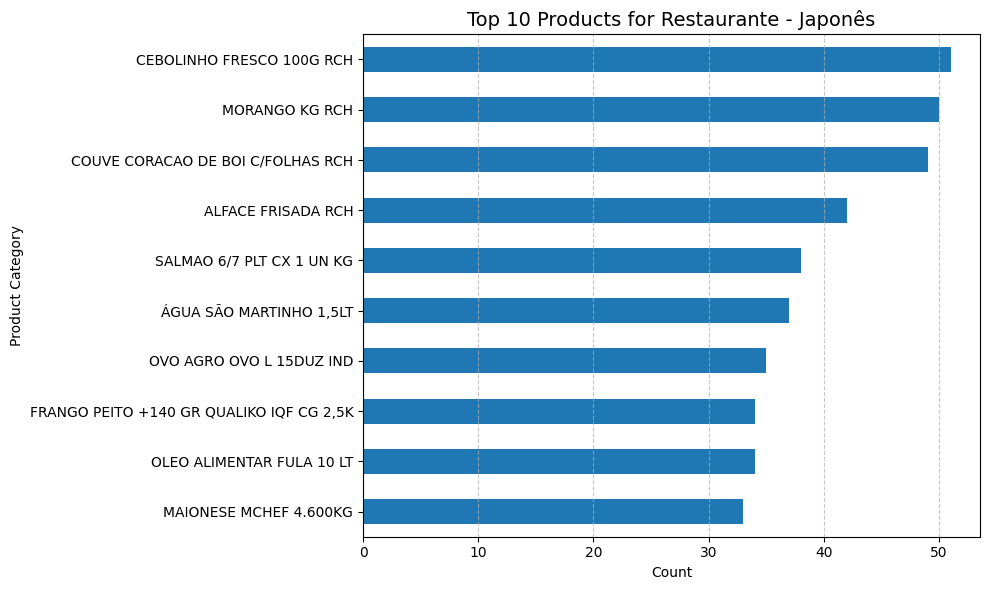

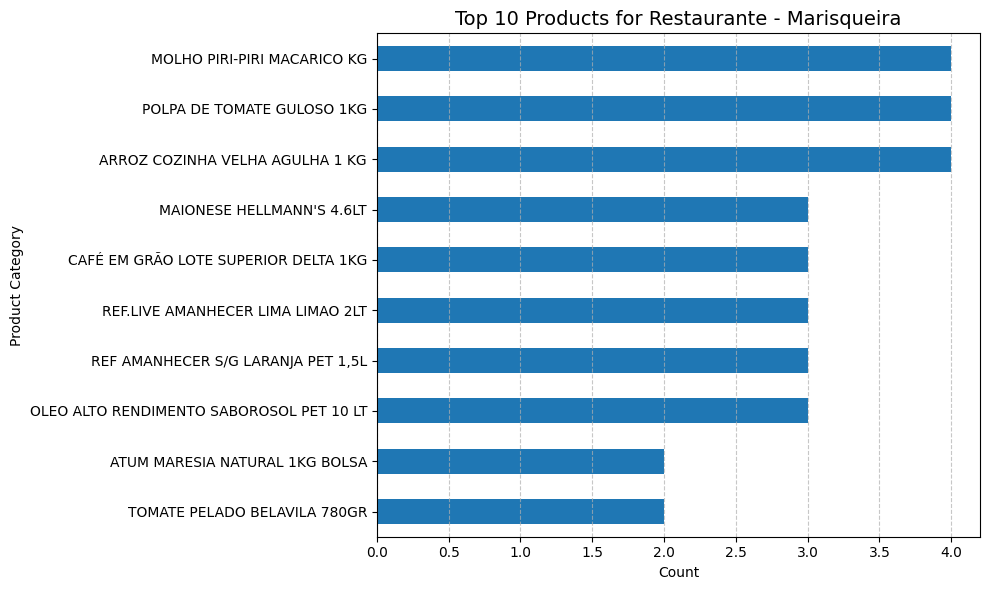

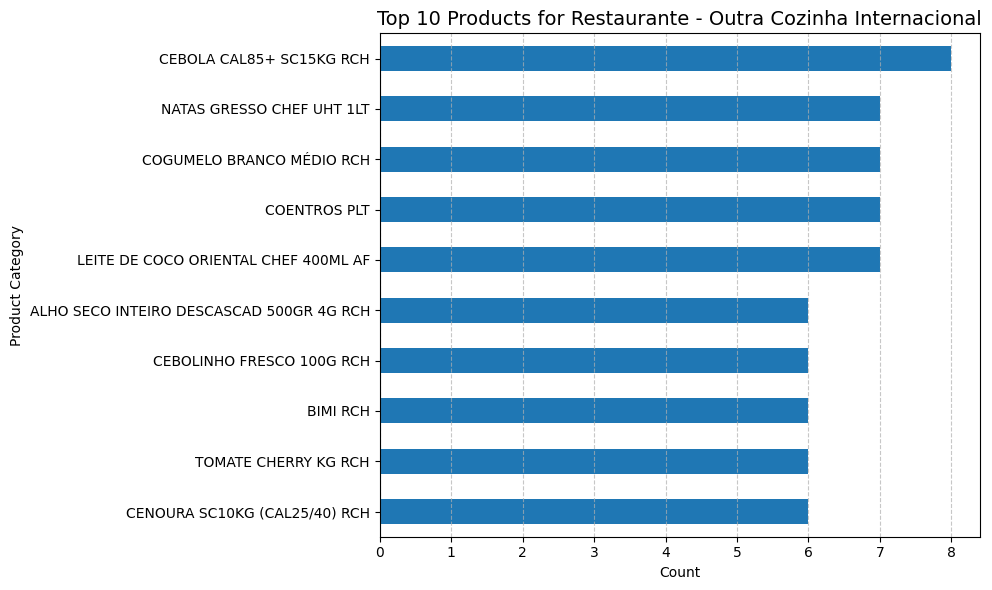

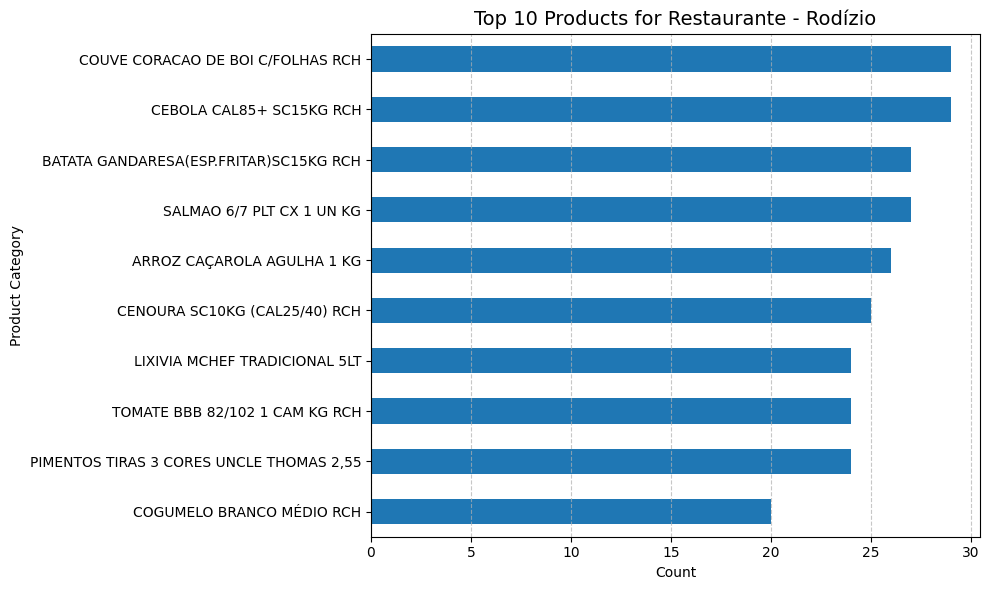

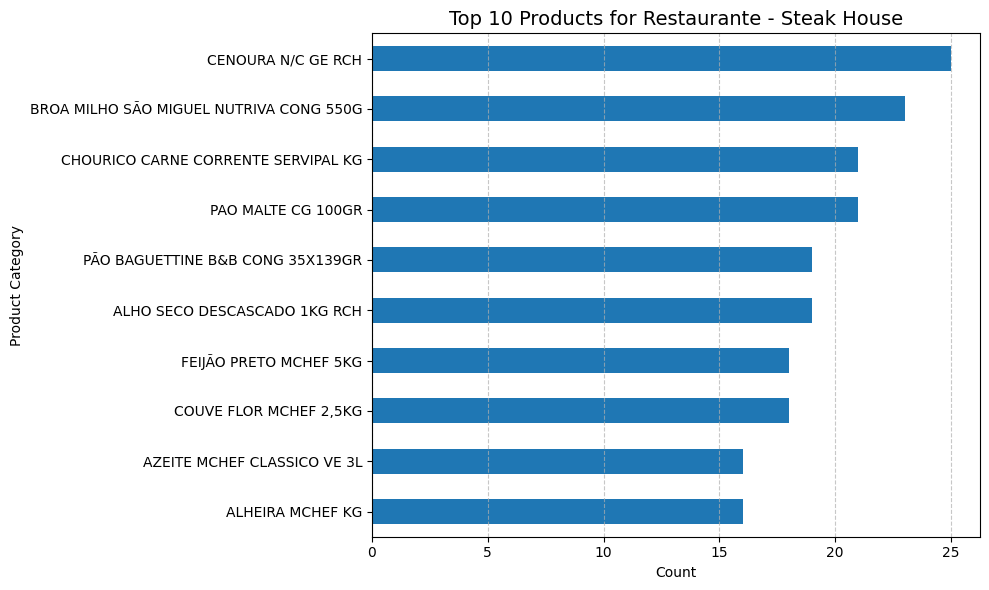

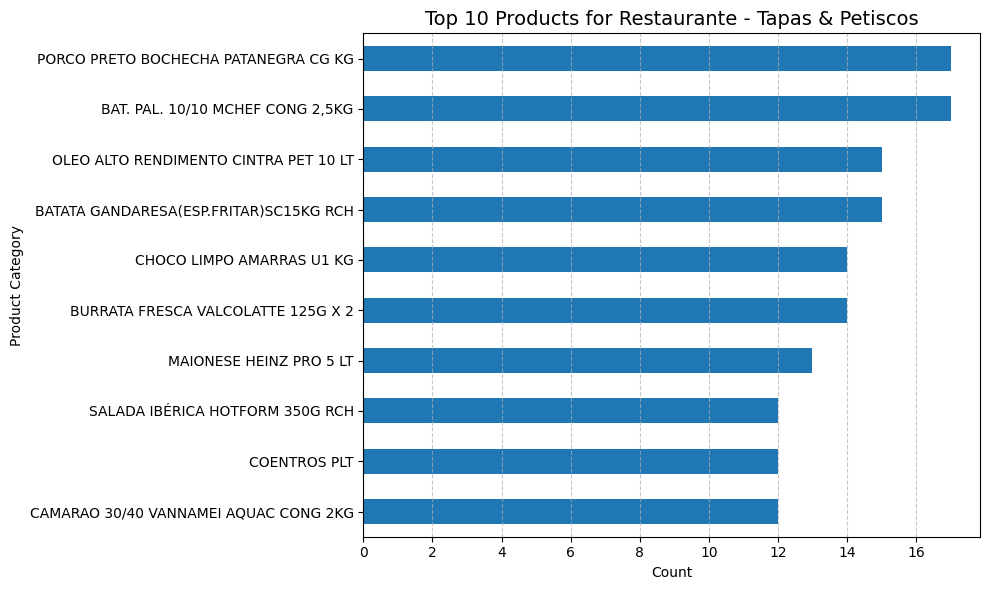

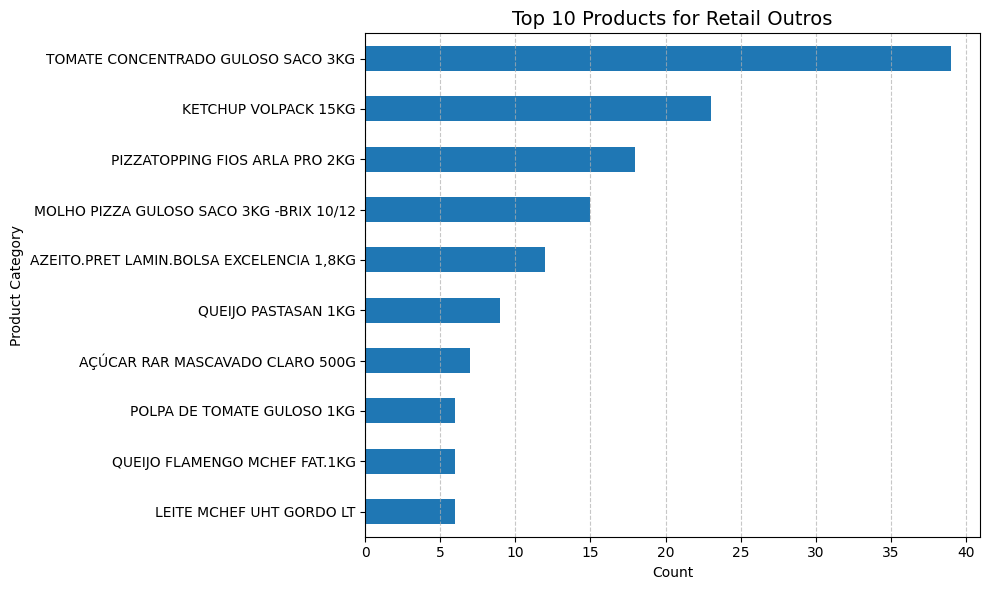

In [120]:
# we now want to see the top 10 products sold for each client type

for i, group in df.groupby('ID Client Type'):
    plt.figure(figsize=(10, 6))
    group['Product Description'].value_counts().head(10).iloc[::-1].plot(kind='barh')
    plt.title(f'Top 10 Products for {i}', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
    plt.xlabel('Count', fontsize=subPlots_xAxis_fontSize)
    plt.ylabel('Product Category', fontsize=subPlots_yAxis_fontSize)
    plt.xticks(fontsize=subPlots_xAxis_fontSize)
    plt.yticks(fontsize=subPlots_yAxis_fontSize)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

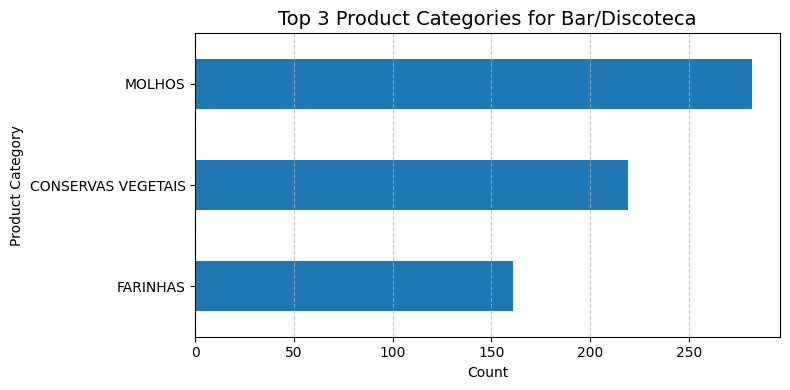

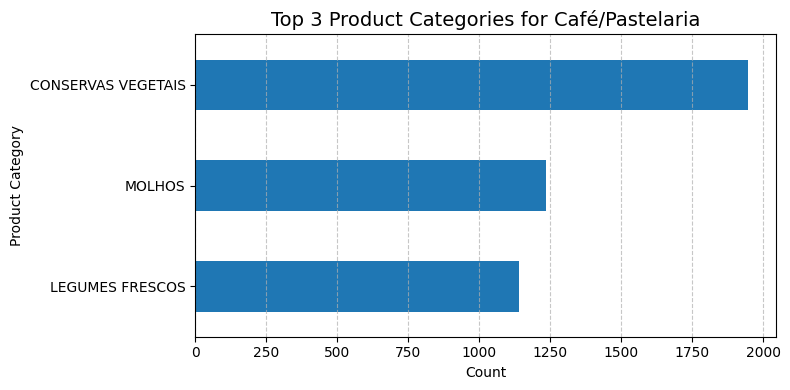

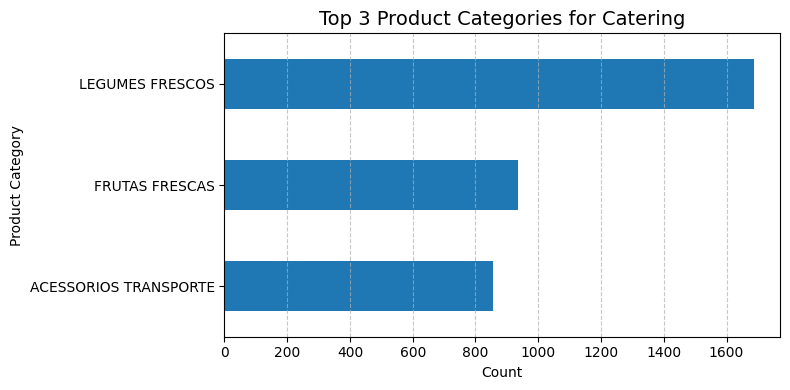

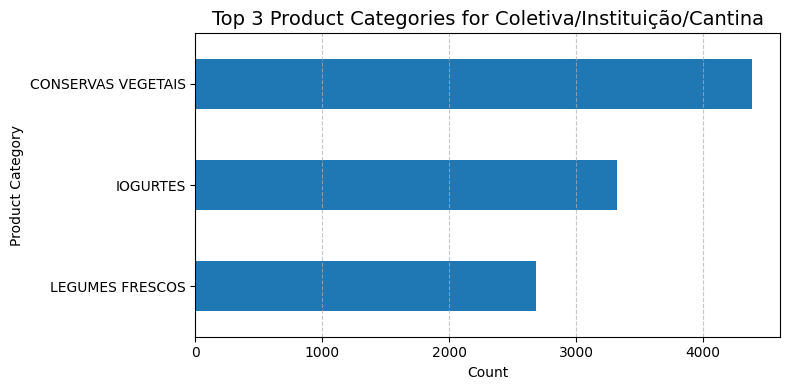

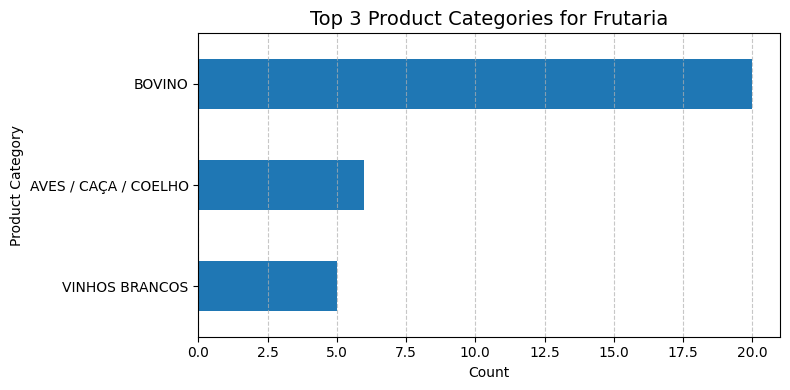

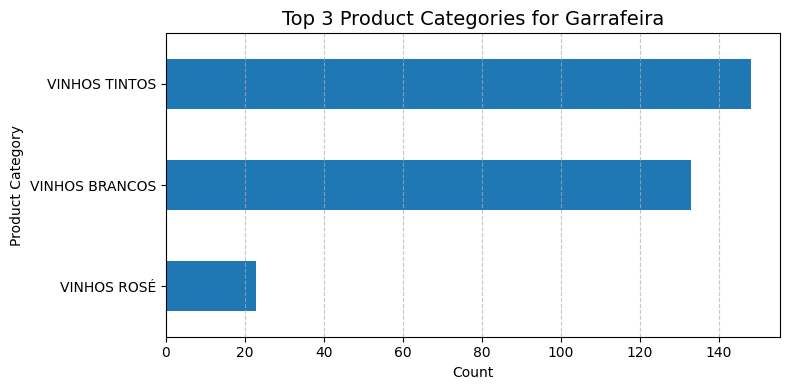

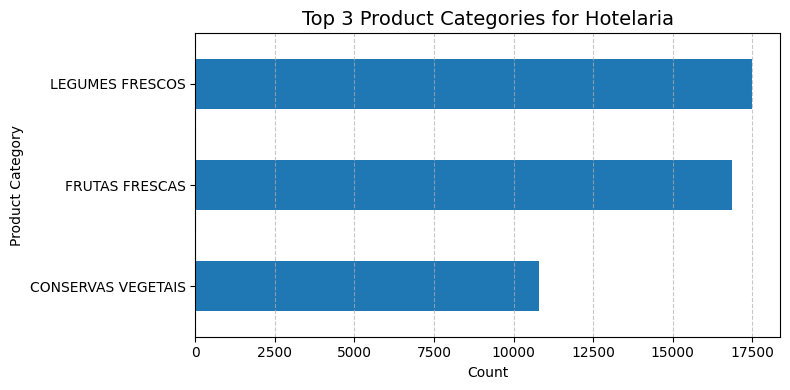

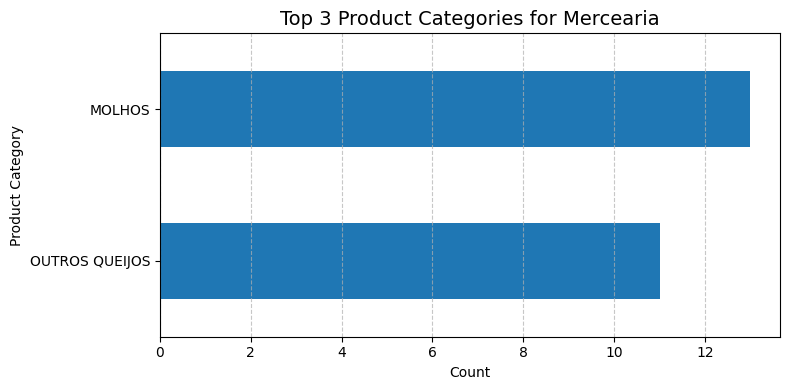

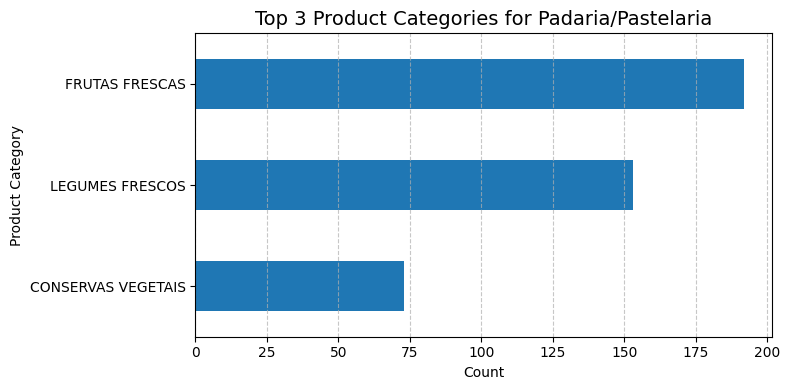

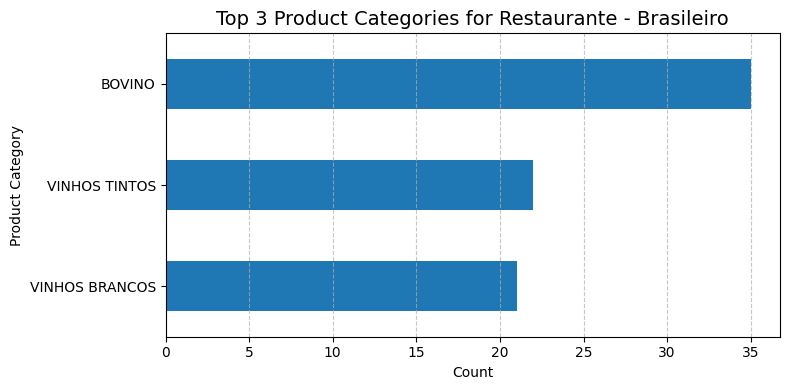

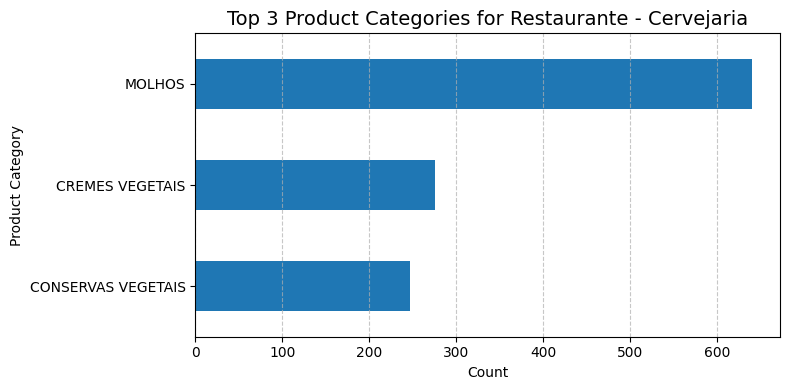

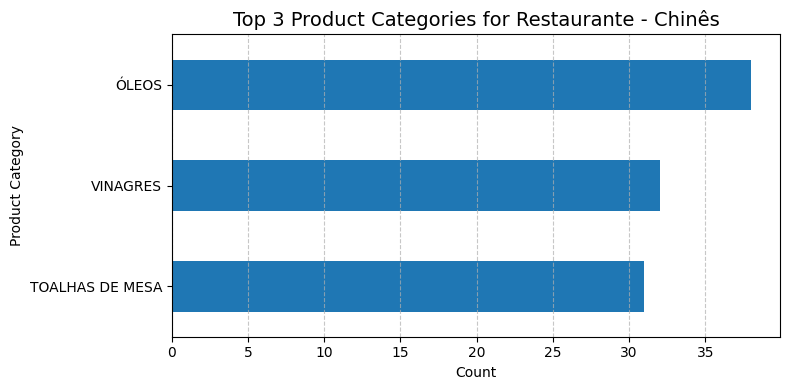

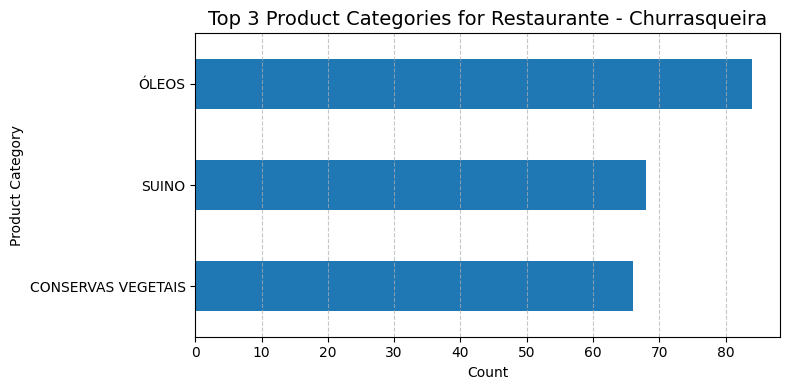

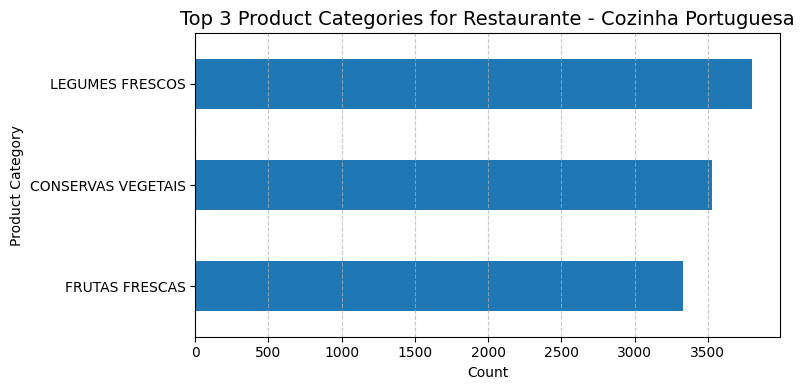

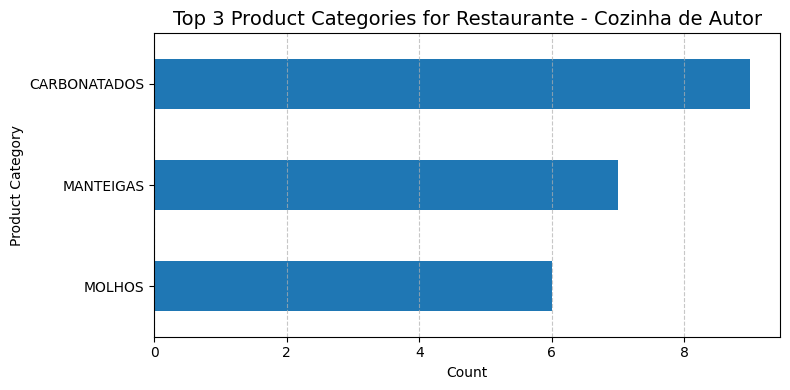

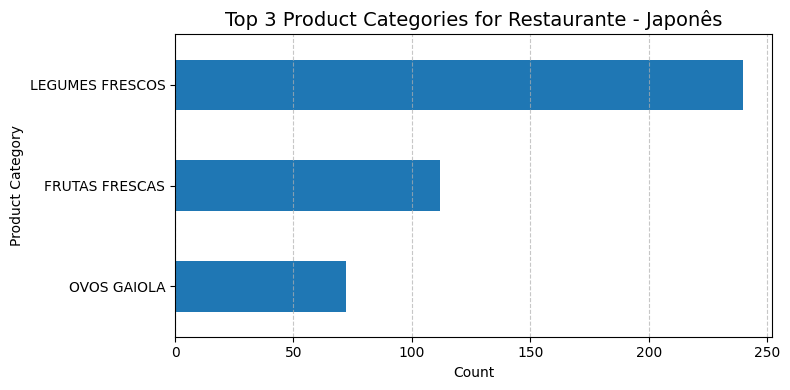

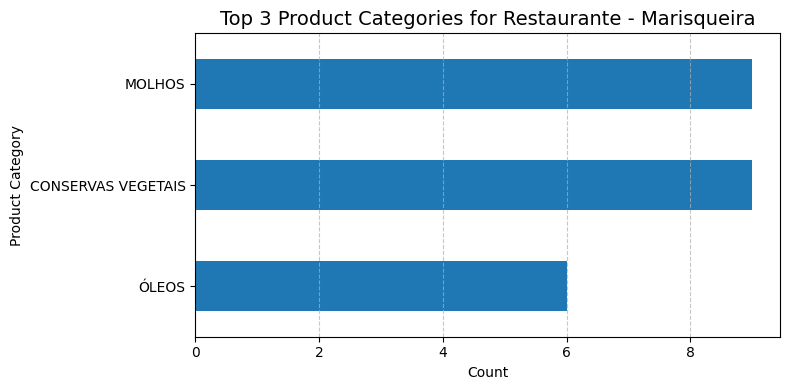

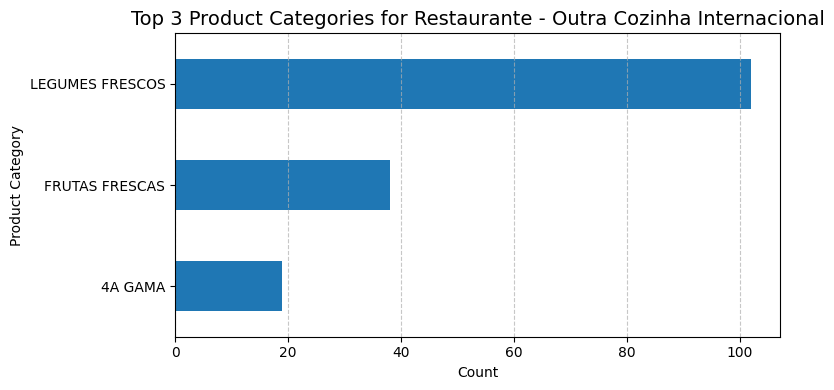

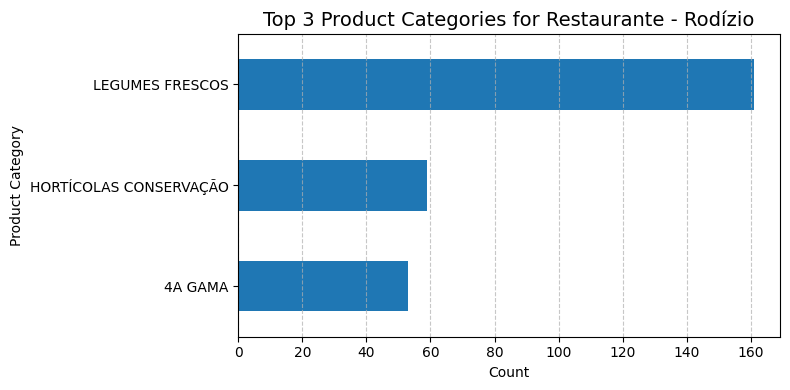

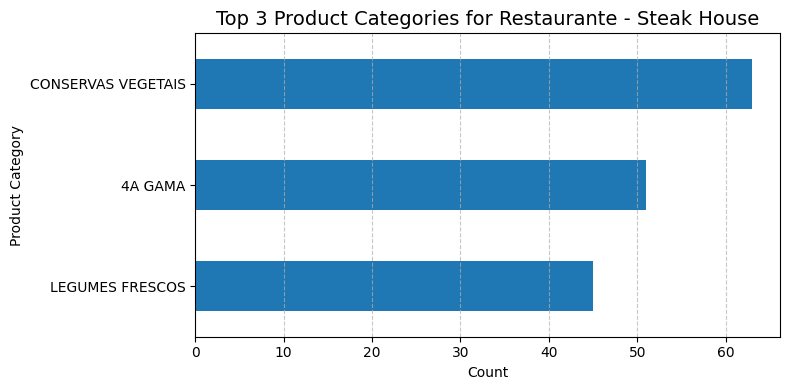

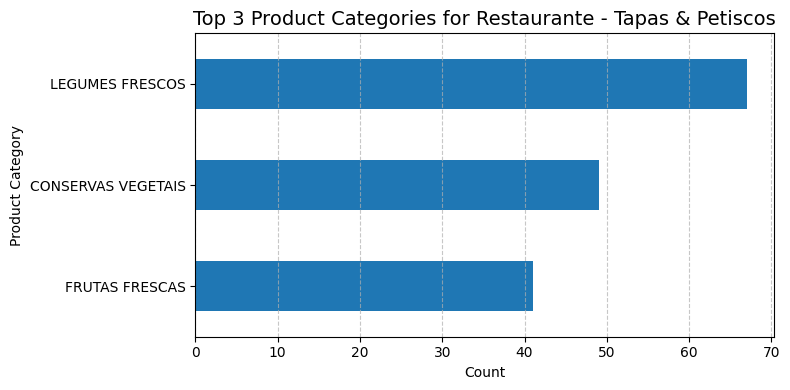

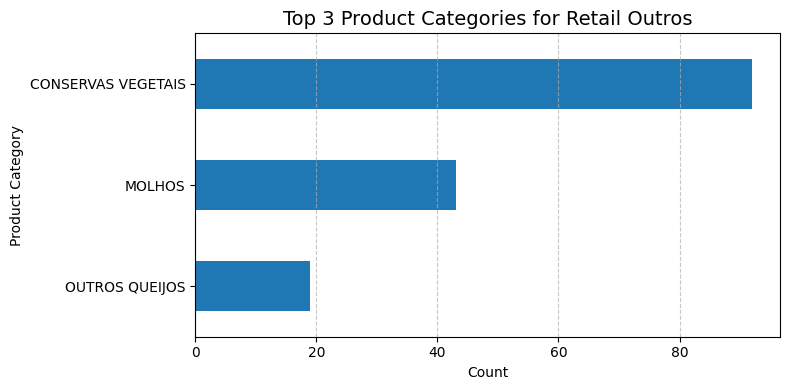

In [123]:
# Now we will see the top 3 product categories sold for each client type

for i, group in df.groupby('ID Client Type'):
    plt.figure(figsize=(8, 4))
    group['ID Product Category'].value_counts().head(3).iloc[::-1].plot(kind='barh')
    plt.title(f'Top 3 Product Categories for {i}', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
    plt.xlabel('Count', fontsize=subPlots_xAxis_fontSize)
    plt.ylabel('Product Category', fontsize=subPlots_yAxis_fontSize)
    plt.xticks(fontsize=subPlots_xAxis_fontSize)
    plt.yticks(fontsize=subPlots_yAxis_fontSize)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Insights

- Some products look weird, like frutaria's top products being meats

## **Exporting**